In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

Loading images

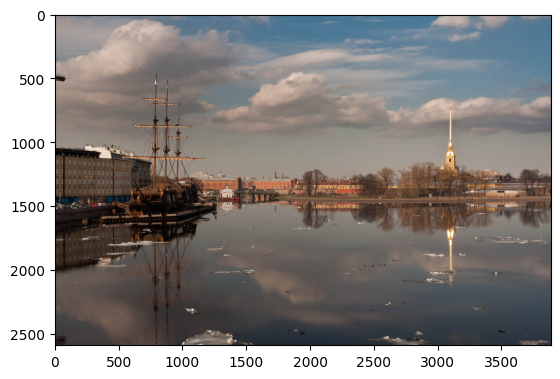

In [3]:
img1 = cv2.imread("boat1.jpg")
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)
plt.imshow(img1)

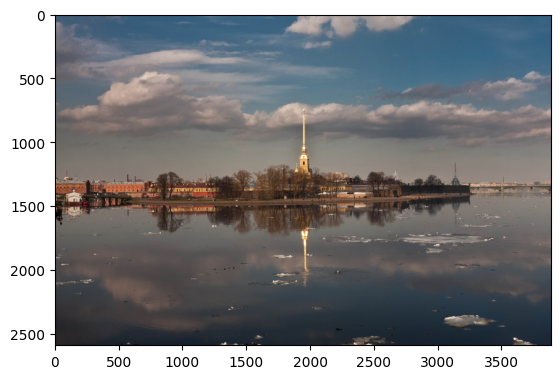

In [4]:
img2 = cv2.imread("boat2.jpg")
img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB)
plt.imshow(img2)

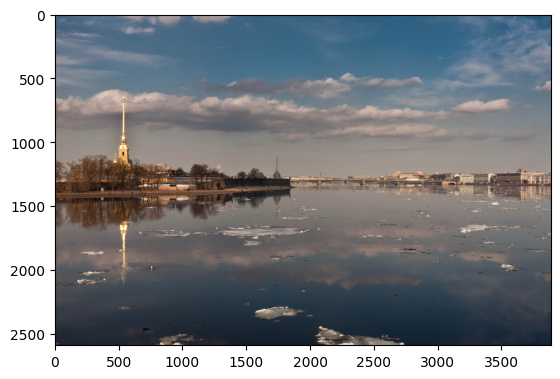

In [5]:
img3 = cv2.imread("boat3.jpg")
img3 = cv2.cvtColor(img3 , cv2.COLOR_BGR2RGB)
plt.imshow(img3)

genrating keypoints

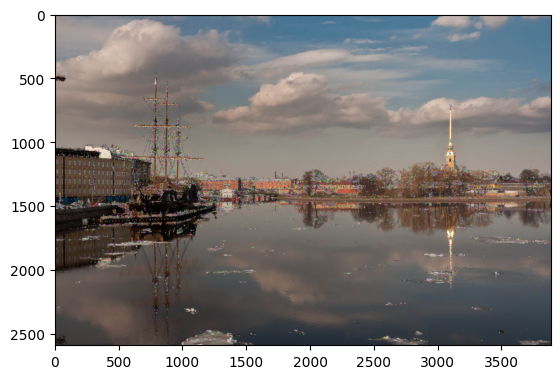

In [6]:
sift = cv2.SIFT_create()
img1kp , img1des = sift.detectAndCompute(img1 , None)
plt.imshow(cv2.drawKeypoints(img1 , img1kp , None))

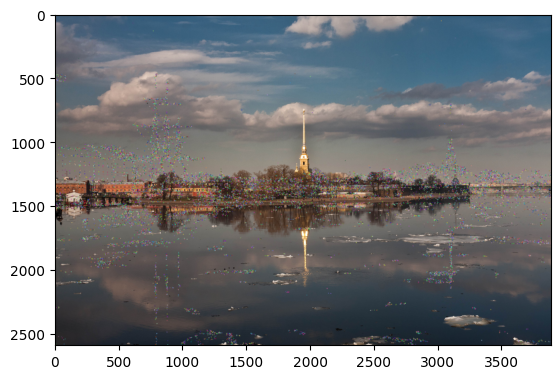

In [7]:
img2kp , img2des = sift.detectAndCompute(img1 , None)
plt.imshow(cv2.drawKeypoints(img2 , img2kp , None))

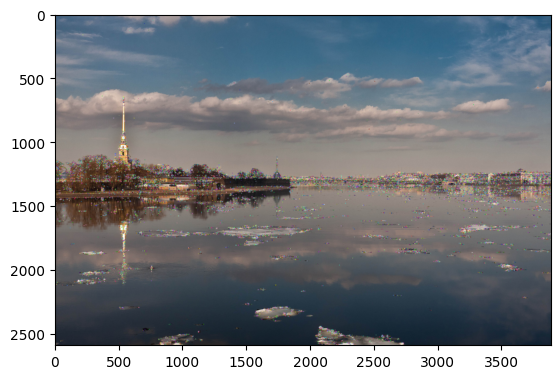

In [8]:
img3kp , img3des = sift.detectAndCompute(img3 , None)
plt.imshow(cv2.drawKeypoints(img3 , img3kp , None))

raw-matching

((< cv2.DMatch 0x7f11dc6fd050>, < cv2.DMatch 0x7f11dc6d2e10>), (< cv2.DMatch 0x7f11dc6d3210>, < cv2.DMatch 0x7f11dc373f30>), (< cv2.DMatch 0x7f11dc373250>, < cv2.DMatch 0x7f11dc373b50>), (< cv2.DMatch 0x7f11dc373390>, < cv2.DMatch 0x7f11dc373c30>), (< cv2.DMatch 0x7f11dc373f70>, < cv2.DMatch 0x7f11dc3e8070>), (< cv2.DMatch 0x7f11dc3e8090>, < cv2.DMatch 0x7f11dc3e8190>), (< cv2.DMatch 0x7f11dc3e85b0>, < cv2.DMatch 0x7f11dc3e8030>), (< cv2.DMatch 0x7f11dc3e8150>, < cv2.DMatch 0x7f11dc3e8170>), (< cv2.DMatch 0x7f11dc3e84d0>, < cv2.DMatch 0x7f11dc3e8130>), (< cv2.DMatch 0x7f11dc3e8630>, < cv2.DMatch 0x7f11dc3e85d0>), (< cv2.DMatch 0x7f11dc3e84b0>, < cv2.DMatch 0x7f11dc3e85f0>), (< cv2.DMatch 0x7f11dc3e80b0>, < cv2.DMatch 0x7f11dc3e82d0>), (< cv2.DMatch 0x7f11dc3e8650>, < cv2.DMatch 0x7f11dc3e8510>), (< cv2.DMatch 0x7f11dc3e8670>, < cv2.DMatch 0x7f11dc3e8570>), (< cv2.DMatch 0x7f11dc3e8610>, < cv2.DMatch 0x7f11dc3e8550>), (< cv2.DMatch 0x7f11dc3e8690>, < cv2.DMatch 0x7f11dc3e86b0>), (< cv2.

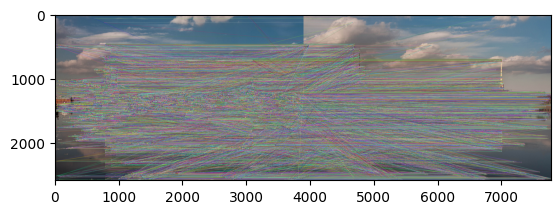

In [9]:
bf = cv2.BFMatcher(cv2.NORM_L1 , crossCheck = False)
matching12 = bf.knnMatch(img1des , img2des , k = 2)
matching23 = bf.knnMatch(img2des , img3des , k = 2)
print(matching12)
plt.imshow(cv2.drawMatchesKnn(img2 , img2kp , img1 , img1kp , matching12 , None))

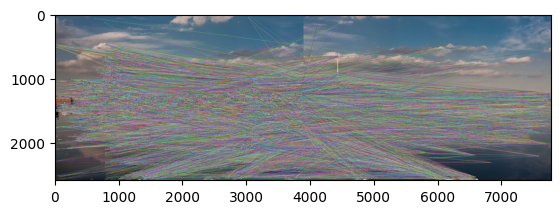

In [10]:
plt.imshow(cv2.drawMatchesKnn(img2 , img2kp , img3 , img3kp , matching23 , None))

imageShifter

In [11]:
def ShiftImage(img, x , y , shape):
    TM = np.array([
        [1 , 0  , x],
        [0 , 1 , y],
        [0 , 0 , 1]
    ] , dtype=np.float32)
    img = cv2.warpPerspective(img , TM , shape)
    return img

goodMatches

In [12]:
def GenrateGoodKeyPoints(rawMatches):
    goodKeypoints = []
    goodMatches = []
    for m1 , m2 in rawMatches:
        if m1.distance < 0.8 * m2.distance:
            goodMatches.append([m1])
            goodKeypoints.append((m1.trainIdx , m1.queryIdx))
    return goodMatches , goodKeypoints

gmatch12 , gkp12 = GenrateGoodKeyPoints(matching12)
gmatch23 , gkp23 = GenrateGoodKeyPoints(matching23)
print(gmatch12)

[[< cv2.DMatch 0x7f11dc6fd050>], [< cv2.DMatch 0x7f11dc6d3210>], [< cv2.DMatch 0x7f11dc373250>], [< cv2.DMatch 0x7f11dc373390>], [< cv2.DMatch 0x7f11dc373f70>], [< cv2.DMatch 0x7f11dc3e8090>], [< cv2.DMatch 0x7f11dc3e85b0>], [< cv2.DMatch 0x7f11dc3e8150>], [< cv2.DMatch 0x7f11dc3e84d0>], [< cv2.DMatch 0x7f11dc3e8630>], [< cv2.DMatch 0x7f11dc3e84b0>], [< cv2.DMatch 0x7f11dc3e80b0>], [< cv2.DMatch 0x7f11dc3e8650>], [< cv2.DMatch 0x7f11dc3e8670>], [< cv2.DMatch 0x7f11dc3e8610>], [< cv2.DMatch 0x7f11dc3e8690>], [< cv2.DMatch 0x7f11dc3e86d0>], [< cv2.DMatch 0x7f11dc3e8710>], [< cv2.DMatch 0x7f11dc3e8750>], [< cv2.DMatch 0x7f11dc3e8790>], [< cv2.DMatch 0x7f11dc3e87d0>], [< cv2.DMatch 0x7f11dc3e8810>], [< cv2.DMatch 0x7f11dc3e8850>], [< cv2.DMatch 0x7f11dc3e8890>], [< cv2.DMatch 0x7f11dc3e88d0>], [< cv2.DMatch 0x7f11dc3e8910>], [< cv2.DMatch 0x7f11dc3e8950>], [< cv2.DMatch 0x7f11dc3e8990>], [< cv2.DMatch 0x7f11dc3e89d0>], [< cv2.DMatch 0x7f11dc3e8a10>], [< cv2.DMatch 0x7f11dc3e8a50>], [< cv2.

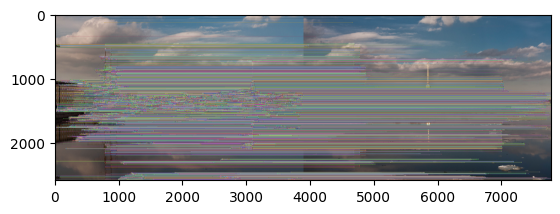

In [13]:
plt.imshow(cv2.drawMatchesKnn(img1 , img1kp , img2 , img2kp , gmatch12 ,None))

True

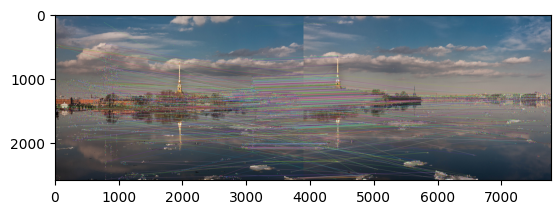

In [14]:
plt.imshow(cv2.drawMatchesKnn(img2 , img2kp , img3 , img3kp , gmatch23 ,None))
imsave = cv2.drawMatchesKnn(img2 , img2kp , img3 , img3kp , gmatch23 ,None)
imsave = cv2.cvtColor(imsave , cv2.COLOR_BGR2RGB)
cv2.imwrite("Output.png" , imsave)

Homography estimation

In [15]:
def HomographyEstimator(srckp,deskp,goodkp):
    src = np.array([srckp[i].pt for (i , _) in goodkp])
    des = np.array([deskp[i].pt for (_ , i) in goodkp])
    H , _ = cv2.findHomography(np.float32(src) , np.float32(des) , cv2.RANSAC , 5.0)
    return H

In [16]:
H12 = HomographyEstimator(img1kp , img2kp , gkp12)
H12

array([[ 1.00000000e+00,  1.41373989e-14, -6.42590355e-12],
       [-1.01931792e-14,  1.00000000e+00, -7.52371961e-12],
       [-6.69234485e-18,  8.89562691e-18,  1.00000000e+00]])

In [17]:
H23 = HomographyEstimator(img3kp , img2kp , gkp23)
H23

array([[ 5.70149196e-01, -1.32108099e-02,  2.60509160e+03],
       [-1.51762979e-01,  9.17688291e-01,  1.49311990e+02],
       [-1.09577126e-04, -4.55296650e-06,  1.00000000e+00]])

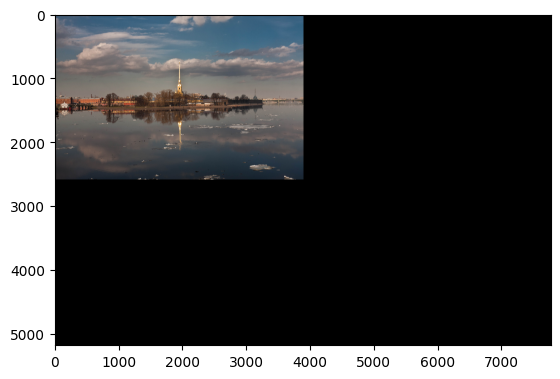

In [18]:
p10 = cv2.warpPerspective(img2.copy() , H12 , (img1.shape[1]*2 , img1.shape[0]*2))
plt.imshow(p10)

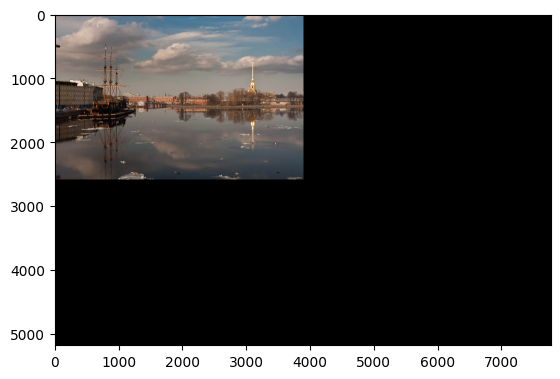

In [19]:
p11 = np.zeros([p10.shape[0] , p10.shape[1] , 3], np.uint8)
p11[:img1.shape[0] , :img1.shape[1]] = img1
plt.imshow(p11)

In [20]:
p20 = cv2.add(p11 , p10)

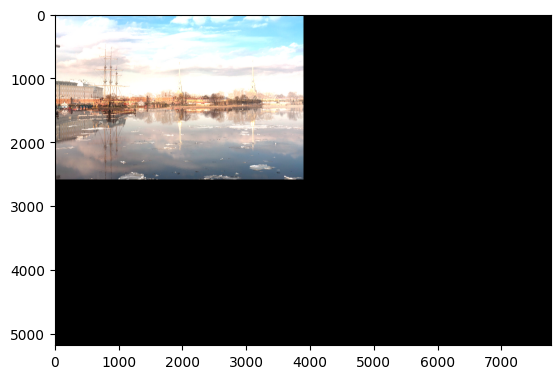

In [21]:
p12 = np.zeros([p20.shape[0] , p20.shape[1] , 3], np.uint8)
p12[:p20.shape[0] , :p20.shape[1]] = p20
plt.imshow(p12)

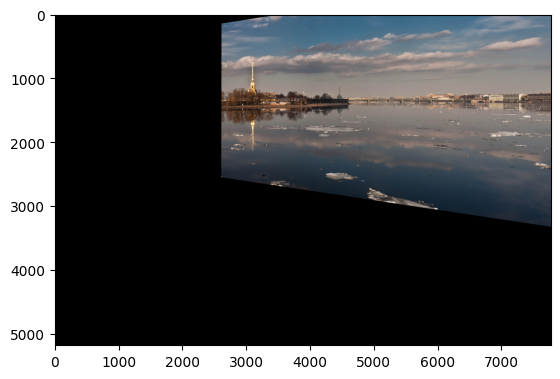

In [22]:
p2 = cv2.warpPerspective(img3, H23 , (p20.shape[1] , p20.shape[0]))
plt.imshow(p2)

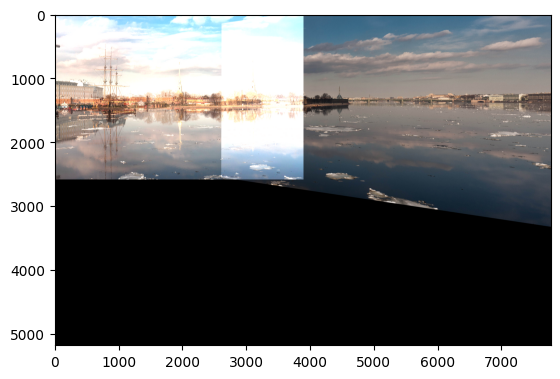

In [23]:
plt.imshow(cv2.add(p12 , p2))